# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Accessing Data">Accessing Data</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="#Storing Data">Storing Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

## Introduction

This project involves the wrangling and analysis of a twitter handle @dog_rates. All 3 datasets used were obtained from udacity servers which was gotten from @dog_rates twitter account. 
Detailed information on all stages involved can be seen below.

## Data Gathering

In [1]:
#Import relevant packages

import pandas as pd
import numpy as np
import requests
import json
import os
import tweepy
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Reading our twitter archived data
d1 = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
p = requests.get(url)

In [4]:
open ('image-predictions.tsv','wb').write(p.content)
    
image_predict = pd.read_csv('image-predictions.tsv',sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
!pip install tweepy==4.6.0;

In [6]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
ids_tweet = d1.tweet_id.values
len(ids_tweet)

2356

In [8]:
os.listdir()

['tweet_data.csv',
 'twitter-archive-enhanced.csv',
 'Untitled Folder',
 'twitter_archive_master.csv',
 'act_report.ipynb',
 'tweet-json.txt',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb']

In [9]:
#Reading the json file

tweets_list = []
with open('tweet-json.txt', 'r') as openfile:
    for p in openfile:
        data = json.loads(p)
        tweets_list.append(data)

In [10]:
#Converting the json file to a dataframe

df = pd.DataFrame(tweets_list)

In [11]:
#Extracting tweet_id, retweet_count and favorite_count
j_data = []
for p in tweets_list:
        j_data.append({"tweet_id" : p['id'], "rt" : p['retweet_count'], "favorite" : p['favorite_count']})

In [12]:
#Creating a dataframe
df1 = pd.DataFrame(j_data, columns=["tweet_id",'rt', 'favorite'])

In [13]:
df1.head(5)

,tweet_id,rt,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
#Saving our extracted json to csv
df1.to_csv('tweet_data.csv', index = False)

In [15]:
#Loading data of each files
json_data = pd.read_csv('tweet_data.csv')
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
image_predict = pd.read_csv('image-predictions.tsv',sep="\t")

# Accessing Data

### Json Data

In [16]:
json_data.head(10)

,tweet_id,rt,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [17]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null int64
rt          2354 non-null int64
favorite    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
json_data.describe()

,tweet_id,rt,favorite
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
json_data.duplicated().sum()

0

### Twitter Archive

In [20]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive.duplicated().sum()

0

In [23]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
twitter_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [27]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
an             7
Daisy          7
Toby           7
Bailey         7
Rusty          6
Scout          6
Stanley        6
Jax            6
Bella          6
Koda           6
Jack           6
Dave           6
Milo           6
Oscar          6
Leo            6
George         5
            ... 
Blu            1
Philippe       1
Tango          1
Mya            1
Rupert         1
Rodney         1
Jett           1
Zuzu           1
Blipson        1
Simba          1
Kevon          1
Jessifer       1
Kendall        1
Hubertson      1
Anthony        1
Steve          1
my             1
Perry          1
Noosh          1
Covach         1
his            1
River          1
Charl          1
Ace            1
Alf            1
Corey          1
Monkey         1
Jeffri        

In [30]:
#Checking through text column

twitter_archive.text.unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'], dtype=object)

### Image Predict

In [31]:
image_predict.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [32]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
image_predict.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [35]:
image_predict.duplicated().sum()

0

In [36]:
image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues
1. Dogs without names, but given names of "a" or "an" instead of "None"

2. incorrect datatype in columns 'rating numerator', 'rating denominator', source and timestamp should be fixed.

3. Tweet_id has a wrong datatype in all the 3 data files

4. Some rows possess redundant retweets

5. Some rating_denominator do not equal 10

6. Some columns aint needed for our analysis hence, drop in_reply_to_status_id, in_reply_to_user_id, expanded_urls and img_num columns from image_predict column

7. Since source column contains over 90% duplicates, the column should be dropped

8. The text column contains a url which should be removed

### Tidiness issues
1. 4 columns in twitter_archive data exist as dog stages i.e doggo, floofer, pupper and puppo

2. The json_data file should be combined with the twitter_archive file

## Cleaning Data

In [37]:
# Make copies of original pieces of data
json_clean = json_data.copy()
twitter_clean = twitter_archive.copy()
predict_clean = image_predict.copy()

### Quality issues

### Issue #1:

#### Define: Dogs without names, but given names of "a" or "an" instead of "None"

#### Code

In [38]:
#check samples with name = an

twitter_clean[twitter_clean['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [39]:
#replacing an with none

twitter_clean.name.replace({'an'},{'None'},inplace=True)

In [40]:
#check samples with name = a

twitter_clean[twitter_clean['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [41]:
#replacing a with None

twitter_clean.name.replace({'a'},{'None'},inplace=True)

In [42]:
#replace None with null values

twitter_clean['name']=twitter_clean.name.replace(['None'], np.nan)

#### Test

In [43]:
twitter_clean.name.value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Buddy         7
Daisy         7
Toby          7
Dave          6
Bella         6
Koda          6
Leo           6
Jack          6
Jax           6
Oscar         6
Stanley       6
Rusty         6
Milo          6
Scout         6
Oakley        5
Sunny         5
Larry         5
Chester       5
             ..
Meera         1
Blu           1
Philippe      1
Tango         1
Mya           1
Ulysses       1
Covach        1
Pippin        1
Perry         1
Iroh          1
Zuzu          1
Simba         1
Kevon         1
Jessifer      1
Kendall       1
Hubertson     1
Anthony       1
my            1
Blipson       1
Berb          1
Noosh         1
his           1
River         1
Charl         1
Ace           1
Alf           1
Corey         1
Monkey        1
Jeffri        1
Flurpson      1
Name: name, Length: 954,

### Issue #2:

#### Define: Tweet_id has a wrong datatype in all the 3 data files

#### Code

In [44]:
#Converting tweet_id to str from json, image_predict, twitter_archive files.
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
predict_clean.tweet_id = predict_clean.tweet_id.astype(str)
json_clean.tweet_id = json_clean.tweet_id.astype(str)

#### Test

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1549 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [46]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [47]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null object
rt          2354 non-null int64
favorite    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #3:

#### Define: Some rows possess redundant retweets

#### Code

In [48]:
rt = list(twitter_clean[twitter_clean["retweeted_status_id"].isnull()==False].index)

twitter_clean.drop(axis=0, index=rt, inplace=True)

In [49]:
#Dropping retweet_status_id, retweet_status_user_id and retweet_status_timestamp

twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [50]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1434 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


### Issue #4:

#### Define: 'rating numerator', 'rating denominator', source and timestamp possess wrong datatype

#### Code

In [51]:
#Converting rating numerator to a float datatype

twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].astype('float')

In [52]:
#json_clean = json_data.copy()
#twitter_clean = twitter_archive.copy()
#predict_clean = image_predict.copy()

In [53]:
#Converting rating denominator to a float datatype

twitter_clean['rating_denominator'] = twitter_clean['rating_denominator'].astype('float')

In [54]:
#Converting Source datatype

twitter_clean.source = twitter_clean.source.astype('category')

In [55]:
#Converting from string to datetime

twitter_clean.timestamp = twitter_clean.timestamp.astype('datetime64')

#### Test

In [56]:
#Checking the denominator datatype

twitter_clean['rating_denominator'].dtype

dtype('float64')

In [57]:
#Checking the numerator datatype

twitter_clean['rating_numerator'].dtype

dtype('float64')

In [58]:
#Checking the Source datatype

twitter_clean.source.dtype

CategoricalDtype(categories=['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
                 ordered=False)

In [59]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1434 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: category(1), datetime64[ns](1), float64(4), object(8)
memory usage: 240.2+ KB


In [60]:
twitter_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

### Issue #5:

#### Define: Some rating_denominator do not equal 10

#### Code

In [61]:
twitter_clean = twitter_clean.drop('rating_denominator',axis=1)

#### Test

In [62]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6:

#### Define: Some columns aint needed for our analysis hence, drop in_reply_to_status_id, in_reply_to_user_id, expanded_urls and img_num columns from image_predict column

#### Code

In [63]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'],axis=1,inplace=True)

In [64]:
predict_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [65]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [66]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


### Issue #7:

#### Define: Since source column contains over 90% duplicates, the column should be dropped

#### Code

In [67]:
twitter_clean.drop('source',axis=1,inplace=True)

#### Test

In [68]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id            2175 non-null object
timestamp           2175 non-null datetime64[ns]
text                2175 non-null object
rating_numerator    2175 non-null float64
name                1434 non-null object
doggo               2175 non-null object
floofer             2175 non-null object
pupper              2175 non-null object
puppo               2175 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 169.9+ KB


### Issue #8:

#### Define: The text column contains a url which should be removed

#### Code

In [69]:
twitter_clean['text'] = twitter_clean.text.str.replace(r"http\S+", "").str.strip()

In [70]:
twitter_clean.text.unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet'], dtype=object)

After quality problems have been solved, lets check out our files

In [71]:
twitter_clean.head(5)

,tweet_id,timestamp,text,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,Franklin,None,None,None,None


In [72]:
predict_clean.head(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
json_clean.head(5)

,tweet_id,rt,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Test

### Tidiness Issues

### Issue #1:

#### Define: 4 columns in twitter_archive data exist as dog stages i.e doggo, floofer, pupper and puppo. Hence, this should be merged into 1 column

#### Code

In [74]:
twitter_clean['dog_stages'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [75]:
#Separating none from desired yields

twitter_clean['dog_stages'] = twitter_clean['dog_stages'].map(lambda x: x.replace("None",""))

In [76]:
#Introducing commas where necessary

twitter_clean.loc[twitter_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
twitter_clean.loc[twitter_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [77]:
twitter_clean['dog_stages'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

In [78]:
#Replace NONE with null values

twitter_clean['dog_stages']=twitter_clean.dog_stages.replace([''], np.nan)

In [79]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

#### Test

In [80]:
twitter_clean['dog_stages'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

In [81]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id            2175 non-null object
timestamp           2175 non-null datetime64[ns]
text                2175 non-null object
rating_numerator    2175 non-null float64
name                1434 non-null object
dog_stages          344 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 118.9+ KB


### Issue #2:

#### Define: The json_data file should be combined with the twitter_archive file

#### Code

In [82]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id    2354 non-null object
rt          2354 non-null int64
favorite    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [83]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id            2175 non-null object
timestamp           2175 non-null datetime64[ns]
text                2175 non-null object
rating_numerator    2175 non-null float64
name                1434 non-null object
dog_stages          344 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 118.9+ KB


In [84]:
#Merging  the rt_count and favorite_count columns to the archive file, joining on tweet_id

twitter_clean = pd.merge(twitter_clean, json_clean, on = 'tweet_id', how = 'left')

#### Test

In [85]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 8 columns):
tweet_id            2175 non-null object
timestamp           2175 non-null datetime64[ns]
text                2175 non-null object
rating_numerator    2175 non-null float64
name                1434 non-null object
dog_stages          344 non-null object
rt                  2175 non-null int64
favorite            2175 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 152.9+ KB


### Issue #3:

#### Define: Merge p1, p2 and p3 into 1 column and finally, merge predict_clean file and twitter_clean file

#### Code

In [86]:
#setup the conditions for selection
cond = [(predict_clean['p1_dog'] == True), (predict_clean['p2_dog'] == True), (predict_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breeds = [predict_clean['p1'], predict_clean['p2'], predict_clean['p3']]

# select the predicted breed based on the first successful condition
predict_clean['dog_breeds'] = np.select(cond, breeds, default = 'none')

#### Test

In [87]:
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dog_breeds    2075 non-null object
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


In [88]:
predict_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [89]:
predict_clean.head()

,tweet_id,jpg_url,dog_breeds
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [90]:
#We can notice the none value, hence, it should be replaced with null

predict_clean.dog_breeds.value_counts()

none                              324
golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Shih-Tzu                           20
Siberian_husky                     20
kuvasz                             19
Rottweiler                         19
Maltese_dog                        19
Shetland_sheepdog                  19
Lakeland_ter

In [91]:
predict_clean['dog_breeds']=predict_clean.dog_breeds.replace(['none'], np.nan)

In [92]:
predict_clean.dog_breeds.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Shih-Tzu                           20
Siberian_husky                     20
Shetland_sheepdog                  19
Lakeland_terrier                   19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             19
Italian_grey

In [93]:
#Finally, we have to merge twitter_clean and predict_clean.

twitter_clean = pd.merge(twitter_clean, predict_clean, on = 'tweet_id', how = 'inner')

In [94]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id            1994 non-null object
timestamp           1994 non-null datetime64[ns]
text                1994 non-null object
rating_numerator    1994 non-null float64
name                1387 non-null object
dog_stages          306 non-null object
rt                  1994 non-null int64
favorite            1994 non-null int64
jpg_url             1994 non-null object
dog_breeds          1686 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 171.4+ KB


In [95]:
twitter_clean.shape

(1994, 10)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [96]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [97]:
df = twitter_clean.copy()

In [98]:
df.head(5)

,tweet_id,timestamp,text,rating_numerator,name,dog_stages,rt,favorite,jpg_url,dog_breeds
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


In [99]:
#Obtaining details of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 10 columns):
tweet_id            1994 non-null object
timestamp           1994 non-null datetime64[ns]
text                1994 non-null object
rating_numerator    1994 non-null float64
name                1387 non-null object
dog_stages          306 non-null object
rt                  1994 non-null int64
favorite            1994 non-null int64
jpg_url             1994 non-null object
dog_breeds          1686 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 171.4+ KB


### Descriptive Analysis

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating_numerator,1994.0,12.280843,41.497718,0.0,10.00,11.0,12.0,1776.0
rt,1994.0,2766.753260,4674.698447,16.0,624.75,1359.5,3220.0,79515.0
favorite,1994.0,8895.725677,12213.193181,81.0,1982.00,4136.0,11308.0,132810.0


From the above statistical analysis obtained, the following can be deduced;
* The highest retweet(rt) of any dog was 79515 and the lowest was 16
* The highest likes(favorite) of any dog was 132810 and the lowest was 81
* There are 1994 samples to be analyzed
* The mean and 50% percentile of rating_numerator had a difference of 1.28 while that of rt and favorite were far apart with favorite being more than 2 times

In [101]:
df.corr('pearson')

,rating_numerator,rt,favorite
rating_numerator,1.000000,0.013879,0.009995
rt,0.013879,1.000000,0.912947
favorite,0.009995,0.912947,1.000000


A positive correlation exist amongst rating_numerator, retweet(rt) and likes(favorite)

### Insights:
1. 10 Most Popular breeds

2. 10 Least Popular breeds

3. Dog breeds with over 50000 likes(favorite) and retweets(rt)

4. Most Common Dog Stages

#### 10 Most Popular Breeds

In [102]:
df.dog_breeds.value_counts()[0:10]

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
Name: dog_breeds, dtype: int64

Visualisation

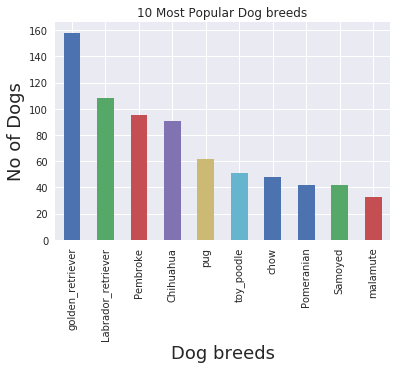

In [103]:
df.dog_breeds.value_counts()[0:10].plot(kind='bar',title='10 Most Popular Dog breeds')
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('No of Dogs', fontsize=18);

From the above analysis and visualisation, the following can be deduced from the 10 most popular dog breeds:
    
    * Golden_retriever is most popular dog
    * Malamute was the least most popular amongst the top 10
    * Pomeranian and Samoyed had same no

#### 10 Least Popular Breeds

In [104]:
#Lets obtain more details before checking out the least breeds

df.dog_breeds.describe()

count                 1686
unique                 113
top       golden_retriever
freq                   158
Name: dog_breeds, dtype: object

In [105]:
df.dog_breeds.value_counts()[103:]

Appenzeller                2
black-and-tan_coonhound    2
silky_terrier              1
EntleBucher                1
Irish_wolfhound            1
Scotch_terrier             1
Japanese_spaniel           1
clumber                    1
standard_schnauzer         1
Bouvier_des_Flandres       1
Name: dog_breeds, dtype: int64

Visualisation

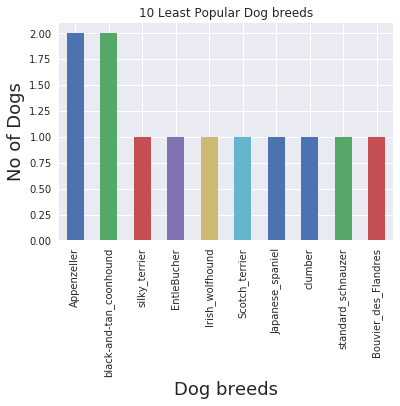

In [106]:
df.dog_breeds.value_counts()[103:].plot(kind='bar',title='10 Least Popular Dog breeds')
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('No of Dogs', fontsize=18);

From the above analysis and visualisation, the following can be deduced from the 10 least popular dog breeds:
    * About 8 dogs were the least popular breeds
    * A total of 113 unique breeds exist
    * Wire-haired_fox_terrier and Australian_terrier are the most popular amongst the 10 least poular breeds 

#### Dog breeds with over 50000 likes(favorite) and retweets(rt)

In [107]:
df.sample(2)

,tweet_id,timestamp,text,rating_numerator,name,dog_stages,rt,favorite,jpg_url,dog_breeds
243,833863086058651648,2017-02-21 02:17:06,This is Bentley. Hairbrushes are his favorite ...,12.0,Bentley,NaN,2729,14661,https://pbs.twimg.com/media/C5J6DIpWQAEosSz.jpg,kuvasz
1829,668981893510119424,2015-11-24 02:38:07,Unique dog here. Oddly shaped tail. Long pink ...,4.0,NaN,NaN,340,573,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,NaN


In [108]:
# Top Dog breeds with over 50000 likes and retweets

df.query('rt >= 50000 and favorite >= 50000').dog_breeds.value_counts()

Chihuahua             1
Labrador_retriever    1
Eskimo_dog            1
Name: dog_breeds, dtype: int64

In [109]:
# Top Dog breeds with either 50000 likes or retweets

df.query('rt >= 50000 or favorite >= 50000').dog_breeds.value_counts()

Labrador_retriever          2
golden_retriever            2
cocker_spaniel              2
Samoyed                     2
French_bulldog              2
Lakeland_terrier            1
Chesapeake_Bay_retriever    1
Saluki                      1
malamute                    1
Italian_greyhound           1
boxer                       1
Eskimo_dog                  1
chow                        1
whippet                     1
Bedlington_terrier          1
Pembroke                    1
standard_poodle             1
Chihuahua                   1
Rottweiler                  1
English_springer            1
Pomeranian                  1
Name: dog_breeds, dtype: int64

In [110]:
# Top 10 Dog breeds with highest no of retweets

df.groupby('rt').dog_breeds.value_counts()[1670:]

rt     dog_breeds        
31314  cocker_spaniel        1
31989  whippet               1
32883  French_bulldog        1
37911  cocker_spaniel        1
42228  standard_poodle       1
45849  English_springer      1
48265  Lakeland_terrier      1
52360  Eskimo_dog            1
56625  Chihuahua             1
79515  Labrador_retriever    1
Name: dog_breeds, dtype: int64

In [111]:
# Top 10 Dog breeds with highest no of likes

df.groupby('favorite').dog_breeds.value_counts()[1675:]

favorite  dog_breeds        
75163     Eskimo_dog            1
75193     malamute              1
75639     cocker_spaniel        1
85011     golden_retriever      1
95450     standard_poodle       1
106827    French_bulldog        1
107015    Chihuahua             1
107956    English_springer      1
131075    Labrador_retriever    1
132810    Lakeland_terrier      1
Name: dog_breeds, dtype: int64

From the above analysis, the following can be deduced:
    * Labrador_retriever, Eskimo_dog and Chihuahua were the breeds with over 50000 retweets(rt) and likes(favorite)
    * Labrador_retriever was the dog with the highest no of retweets(rt) i.e 79515 amongst top 10
    * Cocker_spaniel had the least retweets(rt) i.e 31314 amongst top 10
    * Lakeland_terrier has the highest no of likes(favorite) i.e 132810 amongst top 10
    * Eskimo_dog had the least no of likes(favorite) i.e 75163 amongst top 10
    * Golden_retriever, French_bulldog, Samoyed, Labrador_retriever and Cocker_spaniel were the breeds with either 5000 likes(favorite) or retweets(rt) 

#### Most Common Dog Stages

In [112]:
#Checking for most common dog stages

df.dog_stages.value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stages, dtype: int64

Visualisation

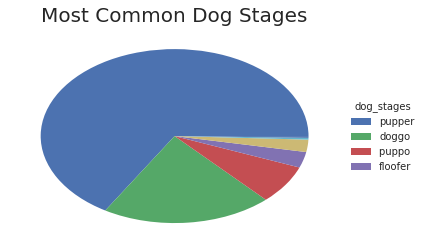

In [113]:
#Plotting a pie chart of most common dog stages

plt.pie(df.dog_stages.value_counts());
plt.legend(['pupper','doggo','puppo ','floofer'],title="dog_stages", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),fontsize=10);
plt.title('Most Common Dog Stages',size =20);

From the above analysis and pie chart, the following can be concluded:
    * Pupper was the most common dog stage
    * Doggo, Floofer and Doggo, Puppo were the least common dog stages

## Conclusion

Upon completing the wrangling and analyzing the different datasets, better understanding of the project can therefore be seen. Insights and visualisations based on the analyses carried out can also be noted for predictions and models to be created in the future.